In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


In [4]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\n {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))


 Logistic Regression
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222

 Random Forest
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965

 SVM
Accuracy: 0.9473684210526315
Precision: 0.922077922077922
Recall: 1.0
F1 Score: 0.9594594594594594

 Naive Bayes
Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0
F1 Score: 0.9793103448275862


In [5]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

print("\n Best Random Forest Params:")
print(grid_rf.best_params_)



 Best Random Forest Params:
{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 150}


In [7]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

param_dist_svm = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

rand_svm = RandomizedSearchCV(SVC(), param_distributions=param_dist_svm,
                               n_iter=10, cv=5, scoring='accuracy', random_state=42)
rand_svm.fit(X_train, y_train)

print("\n Best SVM Params:")
print(rand_svm.best_params_)



 Best SVM Params:
{'C': np.float64(3.1424224295953773), 'gamma': 'auto', 'kernel': 'linear'}


In [8]:
# Best tuned models
final_models = {
    "Best Random Forest": grid_rf.best_estimator_,
    "Best SVM": rand_svm.best_estimator_
}

for name, model in final_models.items():
    preds = model.predict(X_test)
    print(f"\n {name}")
    print(classification_report(y_test, preds))


 Best Random Forest
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


 Best SVM
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



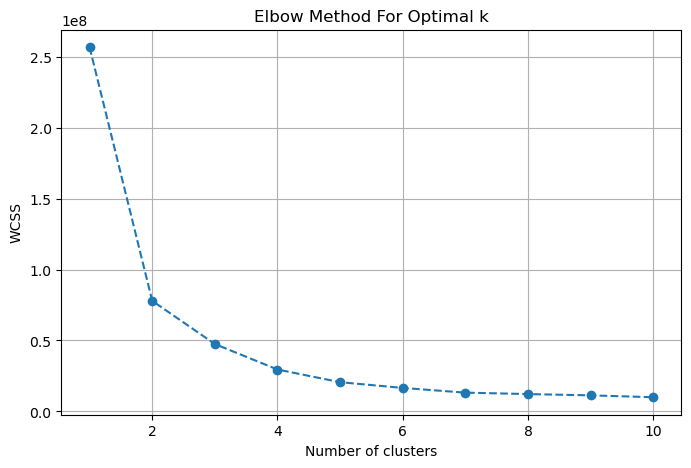

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your scaled data (e.g., from StandardScaler)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset if not already loaded
df = pd.read_csv("your_dataset.csv")  # Replace with your file path

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [11]:
# Fit model with optimal k (replace 3 with your k value)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', label='Centroids', marker='X')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>